In [362]:
"""
Speech Emotion Analysis using Tensorflow

Data: RAVDESS - https://zenodo.org/record/1188976
"""

'\nSpeech Emotion Analysis using Tensorflow\n\nData: RAVDESS - https://zenodo.org/record/1188976\n'

In [363]:
category_emotion = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']
category_gender = ['female', 'male']

In [364]:
import tensorflow as tf
print("tensorflow version - ", tf.__version__)

tensorflow version -  2.0.0-alpha0


In [365]:
import pathlib
data_root = pathlib.Path('data/')

print(data_root)

data


In [366]:
fileList = list(data_root.glob('*/*.wav'))

In [367]:
from dataclasses import dataclass
import pandas as pd
import numpy as np

def process_inputfiles(fileList):
    
    input_label_list = []
    for file in fileList:
        fileNameParts = file.stem.split('-')
        input_label = {}
        input_label['path'] = file
        input_label['name'] = file.stem
        input_label['emotion'] = category_emotion[int(fileNameParts[2])-1]
        input_label['gender'] = category_gender[(int(fileNameParts[6])%2)]
        input_label_list.append(input_label)
        
    return pd.DataFrame(input_label_list)

In [368]:
df = process_inputfiles(fileList)

df.head()

,emotion,gender,name,path
0,angry,female,03-01-05-01-02-01-16,data/Actor_16/03-01-05-01-02-01-16.wav
1,fearful,female,03-01-06-01-02-02-16,data/Actor_16/03-01-06-01-02-02-16.wav
2,fearful,female,03-01-06-02-01-02-16,data/Actor_16/03-01-06-02-01-02-16.wav
3,angry,female,03-01-05-02-01-01-16,data/Actor_16/03-01-05-02-01-01-16.wav
4,disgust,female,03-01-07-01-01-01-16,data/Actor_16/03-01-07-01-01-01-16.wav


In [369]:
# df['emotion_original'] = df['emotion']
# df['gender_original'] = df['gender']
# df = pd.get_dummies(df, columns=['emotion','gender'])
df.head()

,emotion,gender,name,path
0,angry,female,03-01-05-01-02-01-16,data/Actor_16/03-01-05-01-02-01-16.wav
1,fearful,female,03-01-06-01-02-02-16,data/Actor_16/03-01-06-01-02-02-16.wav
2,fearful,female,03-01-06-02-01-02-16,data/Actor_16/03-01-06-02-01-02-16.wav
3,angry,female,03-01-05-02-01-01-16,data/Actor_16/03-01-05-02-01-01-16.wav
4,disgust,female,03-01-07-01-01-01-16,data/Actor_16/03-01-07-01-01-01-16.wav


In [370]:
df = df[:400]
df.shape


(400, 4)

In [371]:
import matplotlib.pyplot as plt
import librosa, librosa.display

def plot_audio(audioFileName, emotion, gender):
    
    fig = plt.figure(figsize=(16, 8))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    
    y, sr = librosa.load(audioFileName)
    y = librosa.util.fix_length(y, 4*sr)
    
    plt.suptitle(str(audioFileName) + ' - ' + emotion + ' - ' + gender)

    plt.subplot(2, 2, 1)
    librosa.display.waveplot(y, sr=sr)
    plt.title('Monophonic')
    
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    plt.subplot(2, 2, 2)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
    plt.title('Mel spectogram')
    
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    plt.subplot(2, 2, 3)
    librosa.display.specshow(D, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Log power spectrogram')
    
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    plt.subplot(2, 2, 4)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.colorbar()
    plt.title('MFCC')

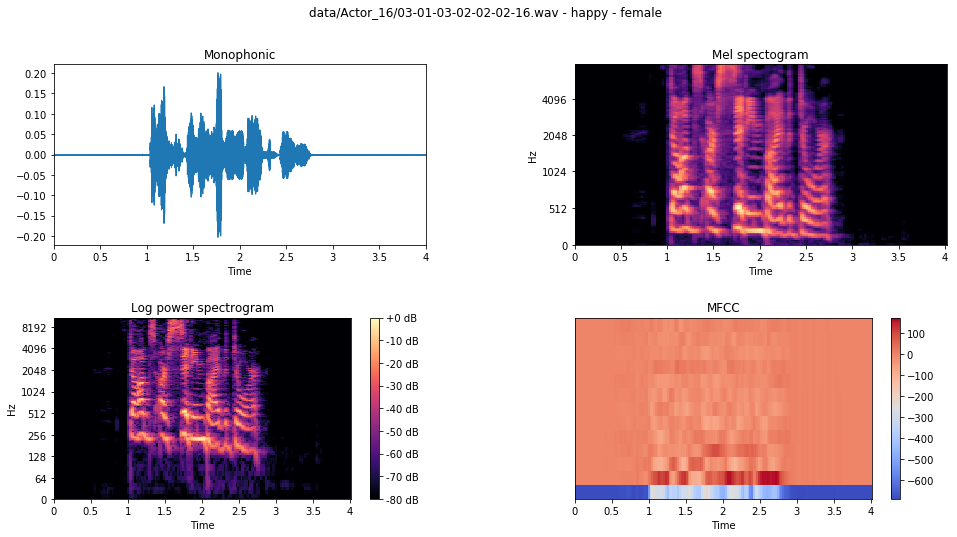

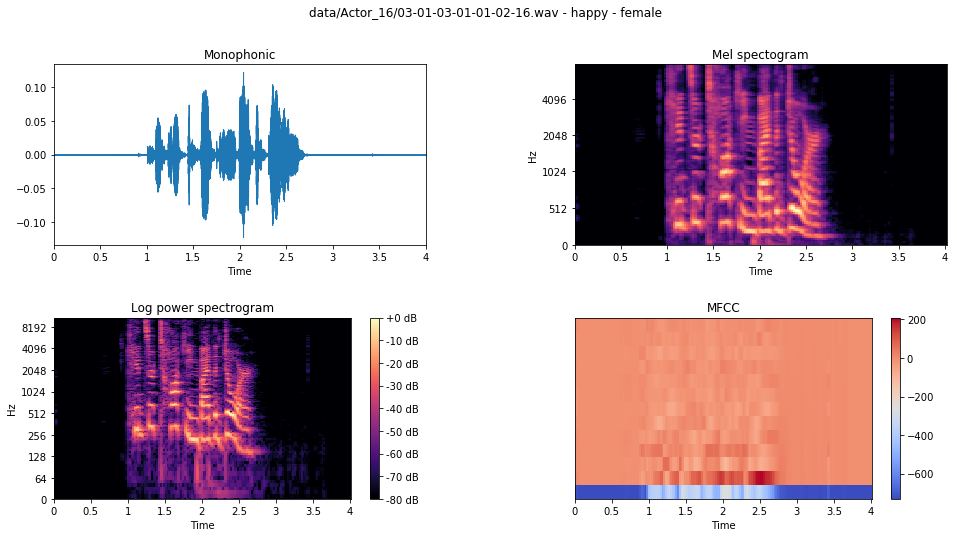

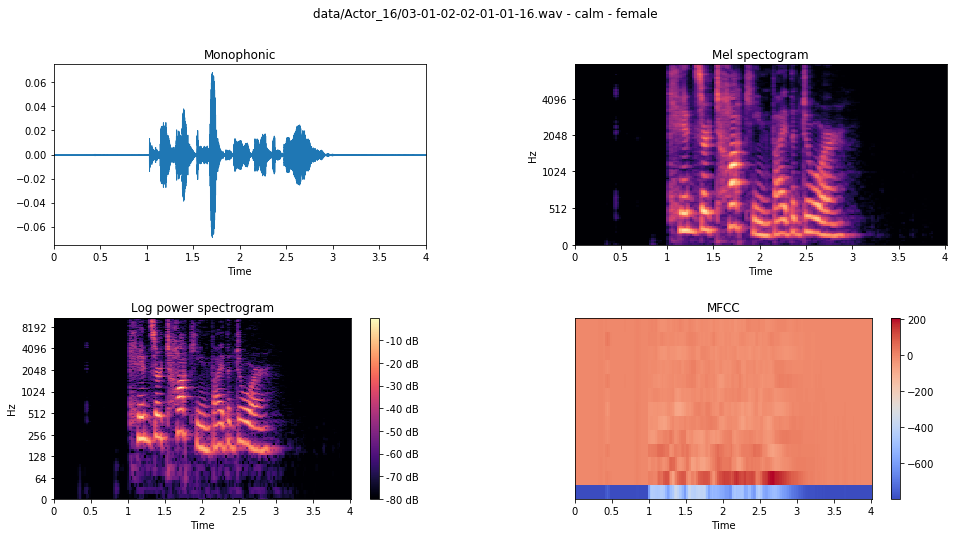

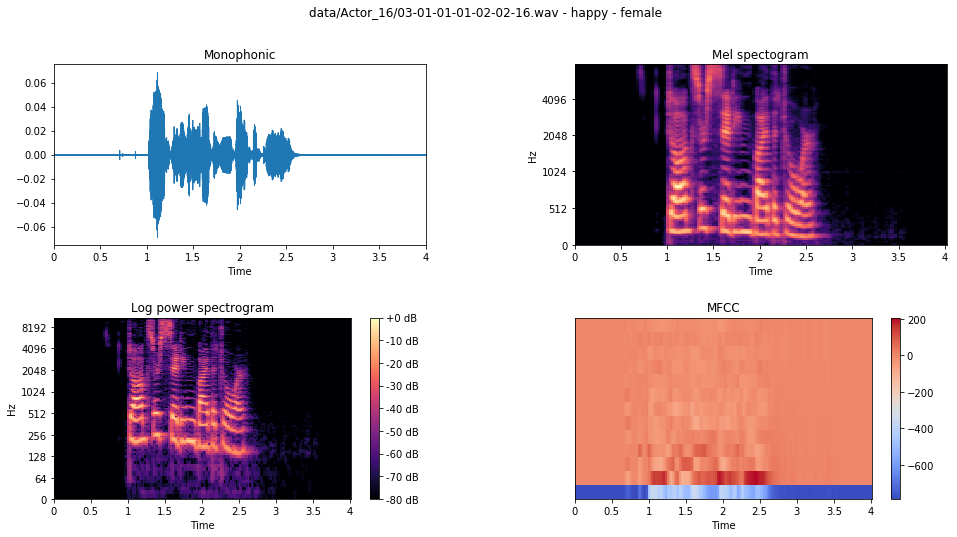

In [340]:
plot_audio(df.iloc[0].path, df.iloc[0].emotion, df.iloc[0].gender)
plot_audio(df.iloc[1].path, df.iloc[1].emotion, df.iloc[1].gender)
plot_audio(df.iloc[2].path, df.iloc[4].emotion, df.iloc[4].gender)
plot_audio(df.iloc[3].path, df.iloc[5].emotion, df.iloc[5].gender)


In [373]:
def process_audio(row):
    audioFilePath = row.path
    
    y, sr = librosa.load(audioFilePath)
    y = librosa.util.fix_length(y, 4*sr)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    row['mfcc'] = np.ravel(mfccs)
    return row
    
df['mfcc'] = np.nan
df = df.apply(lambda row: process_audio(row), axis=1)

In [374]:
df.head()

,emotion,gender,name,path,mfcc
0,angry,female,03-01-05-01-02-01-16,data/Actor_16/03-01-05-01-02-01-16.wav,"[-724.7665394929518, -724.7665394929518, -724...."
1,fearful,female,03-01-06-01-02-02-16,data/Actor_16/03-01-06-01-02-02-16.wav,"[-708.908931581466, -708.908931581466, -708.90..."
2,fearful,female,03-01-06-02-01-02-16,data/Actor_16/03-01-06-02-01-02-16.wav,"[-550.7672350871729, -550.7672350871729, -550...."
3,angry,female,03-01-05-02-01-01-16,data/Actor_16/03-01-05-02-01-01-16.wav,"[-599.9518684562433, -599.9518684562433, -599...."
4,disgust,female,03-01-07-01-01-01-16,data/Actor_16/03-01-07-01-01-01-16.wav,"[-826.9097881615346, -826.9097881615346, -826...."


In [375]:
mfcc_values = df['mfcc'].values
print(mfcc_values.shape)

predictors = np.empty((mfcc_values.shape[0], 2249))
for index, row in df.filter(['mfcc'], axis=1).iterrows():
    print(row.values)
    np.append(predictors, row.values)
    
print(predictors.shape)


(400,)
[array([-724.76653949, -724.76653949, -724.76653949, ...,    0.        ,
          0.        ,    0.        ])]
[array([-708.90893158, -708.90893158, -708.90893158, ...,    0.        ,
          0.        ,    0.        ])]
[array([-550.76723509, -550.76723509, -550.76723509, ...,    0.        ,
          0.        ,    0.        ])]
[array([-5.99951868e+02, -5.99951868e+02, -5.99951868e+02, ...,
        2.81471974e-02,  0.00000000e+00,  0.00000000e+00])]
[array([-826.90978816, -826.90978816, -826.90978816, ...,    0.        ,
          0.        ,    0.        ])]
[array([-820.01252167, -820.01252167, -820.01252167, ...,    0.        ,
          0.        ,    0.        ])]
[array([-797.28620764, -797.28620764, -797.28620764, ...,    0.        ,
          0.        ,    0.        ])]
[array([-774.63057289, -774.63057289, -774.63057289, ...,    1.53678711,
         -0.81979521,    1.72910507])]
[array([-696.3128692 , -695.89320637, -696.56544186, ...,    0.        ,
          0.

[array([-795.61793911, -796.18127502, -796.9193365 , ...,    0.        ,
          0.        ,    0.        ])]
[array([-762.01398996, -762.77584863, -765.41701708, ...,    0.        ,
          0.        ,    0.        ])]
[array([-872.89752856, -868.34136308, -866.24276058, ...,    0.        ,
          0.        ,    0.        ])]
[array([-766.50291001, -766.52892437, -767.17696716, ...,    0.        ,
          0.        ,    0.        ])]
[array([-551.08747894, -551.54352221, -551.76236785, ...,    0.        ,
          0.        ,    0.        ])]
[array([-614.56616046, -615.81825701, -619.76216033, ...,    0.        ,
          0.        ,    0.        ])]
[array([-838.77745331, -839.86951158, -842.84233534, ...,    0.        ,
          0.        ,    0.        ])]
[array([-742.30044926, -743.12239548, -744.70952544, ...,    0.        ,
          0.        ,    0.        ])]
[array([-703.48043516, -670.8205063 , -638.32103124, ...,    0.        ,
          0.        ,    0.    

[array([-502.77741216, -502.77741216, -502.77741216, ...,    0.        ,
          0.        ,    0.        ])]
[array([-776.31250213, -776.31250213, -776.31250213, ...,    0.        ,
          0.        ,    0.        ])]
[array([-735.78120313, -735.78120313, -735.78120313, ...,    0.        ,
          0.        ,    0.        ])]
[array([-843.24224217, -843.24224217, -843.24224217, ...,    0.        ,
          0.        ,    0.        ])]
[array([-772.38250105, -772.38250105, -772.38250105, ...,    0.        ,
          0.        ,    0.        ])]
[array([-929.72197573, -929.72197573, -929.72197573, ...,    0.        ,
          0.        ,    0.        ])]
[array([-872.10620866, -872.10620866, -872.10620866, ...,    0.        ,
          0.        ,    0.        ])]
[array([-873.4586242, -873.4586242, -873.4586242, ...,    0.       ,
          0.       ,    0.       ])]
[array([-845.96607018, -845.96607018, -845.96607018, ...,    0.        ,
          0.        ,    0.        ])

[array([-843.18430187, -843.18430187, -843.18430187, ...,    0.        ,
          0.        ,    0.        ])]
[array([-1061.39481974, -1061.39481974, -1061.39481974, ...,
           0.        ,     0.        ,     0.        ])]
[array([-700.78709855, -700.78709855, -700.78709855, ...,    0.        ,
          0.        ,    0.        ])]
[array([-7.05080033e+02, -7.05080033e+02, -7.05080033e+02, ...,
       -4.82193708e-01, -6.74330176e-01, -1.67316391e-01])]
[array([-552.4839288, -552.4839288, -552.4839288, ...,    0.       ,
          0.       ,    0.       ])]
[array([-816.95992136, -816.95992136, -816.95992136, ...,    0.        ,
          0.        ,    0.        ])]
[array([-1026.12756641, -1026.12756641, -1026.12756641, ...,
           0.        ,     0.        ,     0.        ])]
[array([-891.23361394, -891.23361394, -891.23361394, ...,    0.        ,
          0.        ,    0.        ])]
[array([-1017.22481472, -1017.22481472, -1017.22481472, ...,
           0.        ,   

[array([-620.81670725, -597.74923664, -575.01403411, ...,    5.07971293,
          3.2299802 ,    2.69922476])]
[array([-502.36268576, -502.36409106, -502.54084065, ...,    0.57593866,
          0.        ,    0.        ])]
[array([-712.14977179, -712.14977179, -712.14977179, ...,    0.        ,
          0.        ,    0.        ])]
[array([-787.35350209, -794.19282144, -806.1188313 , ...,    0.        ,
          0.        ,    0.        ])]
[array([-915.28081142, -913.43033673, -910.05470821, ...,    1.75026957,
          2.9877633 ,    3.35628435])]
[array([-758.78077216, -759.27166587, -759.52500028, ...,    6.57905319,
          6.41825815,    6.69411773])]
[array([-691.2039041 , -693.74649033, -695.45479112, ...,  -16.85961885,
        -14.38198832,   -9.31458855])]
[array([-772.35553177, -750.24923809, -717.37231915, ...,    0.        ,
          0.        ,    0.        ])]
[array([-870.91036039, -841.45333836, -841.83325163, ...,    0.        ,
          0.        ,    0.    

[array([-655.03912035, -654.89288829, -654.81593525, ...,    0.        ,
          0.        ,    0.        ])]
[array([-790.79310871, -788.61510104, -786.36332722, ...,    0.        ,
          0.        ,    0.        ])]
[array([-734.71076663, -733.68853355, -735.82083402, ...,    0.        ,
          0.        ,    0.        ])]
[array([-716.73240859, -718.84354623, -727.04463473, ...,    0.        ,
          0.        ,    0.        ])]
[array([-756.82377967, -757.29790869, -756.99313018, ...,    0.        ,
          0.        ,    0.        ])]
[array([-668.44594314, -668.35063587, -668.73095528, ...,   -7.25537504,
        -12.79211186,   -6.57440502])]
[array([-786.40183559, -784.77069637, -781.52831845, ...,   16.50656905,
         16.7361035 ,   14.59871015])]
[array([-778.40499826, -774.76185868, -773.26967612, ...,    0.        ,
          0.        ,    0.        ])]
[array([-600.77421639, -600.34723034, -601.03812404, ...,    0.        ,
          0.        ,    0.    

In [376]:
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical

target = df.filter(['emotion','gender'], axis=1)
target = pd.get_dummies(target, columns=['emotion','gender'])
# target.drop(['name', 'path', 'mfcc'], axis = 1 )

In [379]:
print(target.head())
print(target.shape)

   emotion_angry  emotion_calm  emotion_disgust  emotion_fearful  \
0              1             0                0                0   
1              0             0                0                1   
2              0             0                0                1   
3              1             0                0                0   
4              0             0                1                0   

   emotion_happy  emotion_neutral  emotion_sad  emotion_surprised  \
0              0                0            0                  0   
1              0                0            0                  0   
2              0                0            0                  0   
3              0                0            0                  0   
4              0                0            0                  0   

   gender_female  gender_male  
0              1            0  
1              1            0  
2              1            0  
3              1            0  
4              1

{'loss': [4.60316421508789, 4.598057130177816, 4.592929255167643, 4.587877356211345, 4.582783177693685, 4.577760302225749, 4.572792263031006, 4.567808577219645, 4.562854175567627, 4.557979335784912, 4.553075917561849, 4.548256988525391, 4.5433856391906735, 4.538614762624105, 4.533860549926758, 4.529141813913981, 4.524470774332682, 4.519790337880452, 4.515184288024902, 4.510621166229248, 4.506044235229492, 4.5014483324686685, 4.496862614949544, 4.492339839935303, 4.48788532892863, 4.483422718048096, 4.479000759124756, 4.474590396881103, 4.470164012908936, 4.465818004608154, 4.46149756749471, 4.4572279802958175, 4.452890021006266, 4.448690573374431, 4.444493579864502, 4.44029006322225, 4.4361698468526205, 4.432066707611084, 4.427971871693929, 4.423864034016927, 4.419798208872478, 4.4157419141133625, 4.411739921569824, 4.4076913007100424, 4.4037348047892255, 4.399782333374024, 4.39586399714152, 4.391947797139486, 4.388065560658773, 4.384180367787679, 4.380435110727946, 4.376669063568115, 

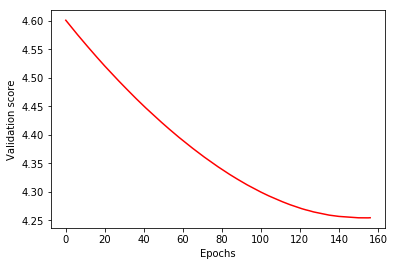

In [382]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)
model = Sequential()

# add layers1
model.add(Dense(2249, activation='relu', input_shape=(2249,)))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# fit model
model_training = model.fit(predictors, target, validation_split=0.25, epochs=400, callbacks=[early_stopping_monitor], verbose=False)


In [385]:
print(model_training.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


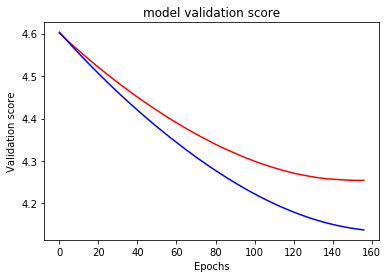

In [395]:
plt.plot(model_training.history['val_loss'], 'r')
plt.plot(model_training.history['loss'], 'b')
plt.title('model validation score')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

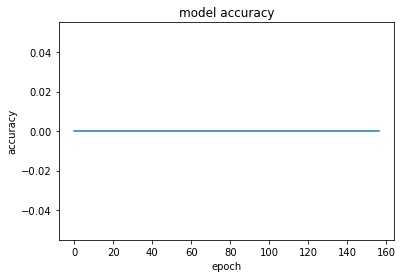

In [396]:
# summarize history for accuracy
# plt.plot(model_training.history['accuracy'])
plt.plot(model_training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()